In [13]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import imdb
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [14]:
# Load data
max_features = 10000
maxlen = 300
batch_size = 64

In [15]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

In [16]:
print('Train sequences:', len(x_train))
print('Test sequences:', len(x_test))

Train sequences: 25000
Test sequences: 25000


In [17]:
x_train = pad_sequences(x_train, maxlen) 
x_test = pad_sequences(x_test, maxlen)

In [19]:
print('X_train shape:', x_train.shape)
print('X_test shape:', x_test.shape)

X_train shape: (25000, 300)
X_test shape: (25000, 300)


In [67]:
# Creating model
def RNN_model(max_features, maxlen, epochs, batch_size):
    model = models.Sequential([
    layers.Embedding(max_features, 128, input_length=maxlen),
    layers.SimpleRNN(64),
    layers.Dropout(0.25),
    layers.Dense(1, activation="sigmoid"),
])
    # Compilation
    model.compile(
    loss="binary_crossentropy",
    optimizer="adam",
    metrics=['accuracy']
)
    
    history_rnn = model.fit(
        x_train, y_train,
        batch_size=64,
        epochs=15,
        validation_data=(x_test, y_test))
    
    test_loss, test_accuracy = model.evaluate(x_test, y_test)
    print(f'Test Accuracy: {test_accuracy*100:.2f}%')
    
    return model, history_rnn

In [68]:
# Train
model, history_rnn = RNN_model(max_features, maxlen, epochs=epochs, batch_size=batch_size)

Epoch 1/15
391/391 [==============================] - 20s 51ms/step - loss: 0.6375 - accuracy: 0.6291 - val_loss: 0.6053 - val_accuracy: 0.6550
Epoch 2/15
391/391 [==============================] - 20s 52ms/step - loss: 0.4166 - accuracy: 0.8134 - val_loss: 0.4986 - val_accuracy: 0.7636
Epoch 3/15
391/391 [==============================] - 20s 51ms/step - loss: 0.2390 - accuracy: 0.9059 - val_loss: 0.4734 - val_accuracy: 0.8148
Epoch 4/15
391/391 [==============================] - 20s 52ms/step - loss: 0.0729 - accuracy: 0.9768 - val_loss: 0.6112 - val_accuracy: 0.7953
Epoch 5/15
391/391 [==============================] - 20s 52ms/step - loss: 0.0589 - accuracy: 0.9792 - val_loss: 0.7153 - val_accuracy: 0.7816
Epoch 6/15
391/391 [==============================] - 20s 52ms/step - loss: 0.0172 - accuracy: 0.9955 - val_loss: 0.8193 - val_accuracy: 0.7928
Epoch 7/15
391/391 [==============================] - 20s 52ms/step - loss: 0.0053 - accuracy: 0.9994 - val_loss: 0.8765 - val_accuracy:

In [60]:
# Display the model summary table to see all layers and their parameters
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_10 (Embedding)    (None, 300, 128)          1280000   
                                                                 
 lstm_2 (LSTM)               (None, 64)                49408     
                                                                 
 dense_10 (Dense)            (None, 1)                 65        
                                                                 
Total params: 1329473 (5.07 MB)
Trainable params: 1329473 (5.07 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [57]:
# Creating model
def LSTM_model(max_features, maxlen, epochs, batch_size):
    model = models.Sequential([
    layers.Embedding(max_features, 128, input_length=maxlen),
    layers.LSTM(64),
    layers.Dense(1, activation="sigmoid"),
])
    # Compilation
    model.compile(
    loss="binary_crossentropy",
    optimizer="adam",
    metrics=['accuracy']
)
    
    history_lstm = model.fit(
        x_train, y_train,
        batch_size=64,
        epochs=15,
        validation_data=(x_test, y_test))
    
    test_loss, test_accuracy = model.evaluate(x_test, y_test)
    print(f'Test Accuracy: {test_accuracy*100:.2f}%')
    
    return model, history_lstm

In [58]:
# Train model
model, history_lstm = LSTM_model(max_features, maxlen, epochs=epochs, batch_size=batch_size)

Epoch 1/15
391/391 [==============================] - 60s 154ms/step - loss: 0.4268 - accuracy: 0.8055 - val_loss: 0.3312 - val_accuracy: 0.8641
Epoch 2/15
391/391 [==============================] - 60s 153ms/step - loss: 0.2590 - accuracy: 0.9006 - val_loss: 0.3154 - val_accuracy: 0.8721
Epoch 3/15
391/391 [==============================] - 61s 155ms/step - loss: 0.1933 - accuracy: 0.9283 - val_loss: 0.3262 - val_accuracy: 0.8660
Epoch 4/15
391/391 [==============================] - 60s 153ms/step - loss: 0.1427 - accuracy: 0.9489 - val_loss: 0.4125 - val_accuracy: 0.8595
Epoch 5/15
391/391 [==============================] - 60s 154ms/step - loss: 0.1099 - accuracy: 0.9608 - val_loss: 0.4175 - val_accuracy: 0.8602
Epoch 6/15
391/391 [==============================] - 61s 156ms/step - loss: 0.0922 - accuracy: 0.9684 - val_loss: 0.4877 - val_accuracy: 0.8547
Epoch 7/15
391/391 [==============================] - 60s 153ms/step - loss: 0.0888 - accuracy: 0.9690 - val_loss: 0.5434 - val_ac

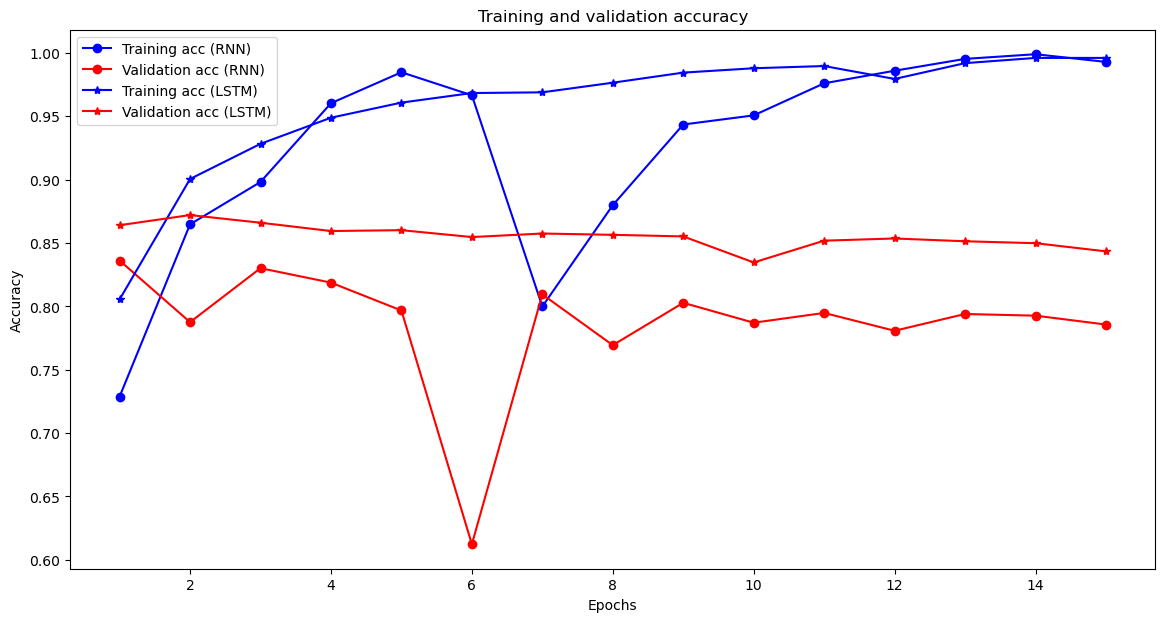

In [66]:
# Vizualization

# RNN training parameters
rnn_val_acc = history_rnn.history['val_accuracy']
rnn_acc = history_rnn.history['accuracy']

# LSTM training parameters
lstm_val_acc = history_lstm.history['val_accuracy']
lstm_acc = history_lstm.history['accuracy']

# Defining the number of epochs
epochs = range(1, len(rnn_acc) + 1)

# Create an accuracy graph
plt.figure(figsize=(14, 7))

# Accuracy graph for RNN
plt.plot(epochs, rnn_acc, 'bo-', label='Training acc (RNN)')
plt.plot(epochs, rnn_val_acc, 'ro-', label='Validation acc (RNN)')

# Accuracy graph for LSTM
plt.plot(epochs, lstm_acc, 'b*-', label='Training acc (LSTM)')
plt.plot(epochs, lstm_val_acc, 'r*-', label='Validation acc (LSTM)')

plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

__Bidirectional and Deep Neural Networks__

In [69]:
# Creating a Deep LSTM Network
def deep_LSTM_model(max_features, maxlen, epochs, batch_size):
    model = models.Sequential([
    layers.Embedding(input_dim=max_features, output_dim=128, input_length=maxlen),
    layers.LSTM(64, return_sequences=True),
    layers.Dropout(0.1),
    layers.LSTM(128),
    layers.Dropout(0.2),
    layers.Dense(1, activation="sigmoid"),
])
    # Compilation
    model.compile(
    loss="binary_crossentropy",
    optimizer="adam",
    metrics=['accuracy']
)
    
    history_deep_lstm = model.fit(
        x_train, y_train,
        batch_size=128,
        epochs=10,
        validation_data=(x_test, y_test))
    
    test_loss, test_accuracy = model.evaluate(x_test, y_test)
    print(f'Test Accuracy: {test_accuracy*100:.2f}%')
    
    return model, history_deep_lstm 

In [70]:
# Train model
model, history_deep_lstm = deep_LSTM_model(max_features, maxlen, epochs=epochs, batch_size=batch_size)

Epoch 1/10
196/196 [==============================] - 125s 634ms/step - loss: 0.4042 - accuracy: 0.8034 - val_loss: 0.3135 - val_accuracy: 0.8673
Epoch 2/10
196/196 [==============================] - 124s 631ms/step - loss: 0.2238 - accuracy: 0.9155 - val_loss: 0.3116 - val_accuracy: 0.8718
Epoch 3/10
196/196 [==============================] - 124s 632ms/step - loss: 0.1588 - accuracy: 0.9414 - val_loss: 0.3659 - val_accuracy: 0.8684
Epoch 4/10
196/196 [==============================] - 123s 630ms/step - loss: 0.1154 - accuracy: 0.9600 - val_loss: 0.4473 - val_accuracy: 0.8644
Epoch 5/10
196/196 [==============================] - 123s 627ms/step - loss: 0.0957 - accuracy: 0.9652 - val_loss: 0.4938 - val_accuracy: 0.8596
Epoch 6/10
196/196 [==============================] - 123s 628ms/step - loss: 0.0612 - accuracy: 0.9795 - val_loss: 0.5198 - val_accuracy: 0.8531
Epoch 7/10
196/196 [==============================] - 125s 640ms/step - loss: 0.0561 - accuracy: 0.9817 - val_loss: 0.5466 -

In [77]:
# Creating a Bidirectional Network
def bidirectional_model(max_features, maxlen, epochs, batch_size):
    model = models.Sequential([
        layers.Embedding(input_dim=max_features, output_dim=128, input_length=maxlen),
        layers.Bidirectional(layers.LSTM(64, return_sequences=True)),
        layers.Dropout(0.1),
        layers.Bidirectional(layers.LSTM(128)), 
        layers.Dropout(0.2),
        layers.Dense(1, activation="sigmoid"),
    ])
    # Compilation
    model.compile(
    loss="binary_crossentropy",
    optimizer="adam",
    metrics=['accuracy']
)
    
    history_bidirectional = model.fit(
        x_train, y_train,
        batch_size=64,
        epochs=10,
        validation_data=(x_test, y_test))
    
    test_loss, test_accuracy = model.evaluate(x_test, y_test)
    print(f'Test Accuracy: {test_accuracy*100:.2f}%')
    
    return model, history_bidirectional 

In [78]:
# Train model
model, history_bidirectional = bidirectional_model(max_features, maxlen, epochs=epochs, batch_size=batch_size)

Epoch 1/10
391/391 [==============================] - 178s 451ms/step - loss: 0.4102 - accuracy: 0.8120 - val_loss: 0.3013 - val_accuracy: 0.8752
Epoch 2/10
391/391 [==============================] - 180s 462ms/step - loss: 0.2314 - accuracy: 0.9125 - val_loss: 0.3815 - val_accuracy: 0.8543
Epoch 3/10
391/391 [==============================] - 181s 462ms/step - loss: 0.1625 - accuracy: 0.9420 - val_loss: 0.3600 - val_accuracy: 0.8533
Epoch 4/10
391/391 [==============================] - 181s 463ms/step - loss: 0.1315 - accuracy: 0.9526 - val_loss: 0.4193 - val_accuracy: 0.8378
Epoch 5/10
391/391 [==============================] - 185s 473ms/step - loss: 0.1081 - accuracy: 0.9626 - val_loss: 0.4418 - val_accuracy: 0.8574
Epoch 6/10
391/391 [==============================] - 198s 505ms/step - loss: 0.0694 - accuracy: 0.9762 - val_loss: 0.5138 - val_accuracy: 0.8540
Epoch 7/10
391/391 [==============================] - 187s 479ms/step - loss: 0.0601 - accuracy: 0.9797 - val_loss: 0.5699 -

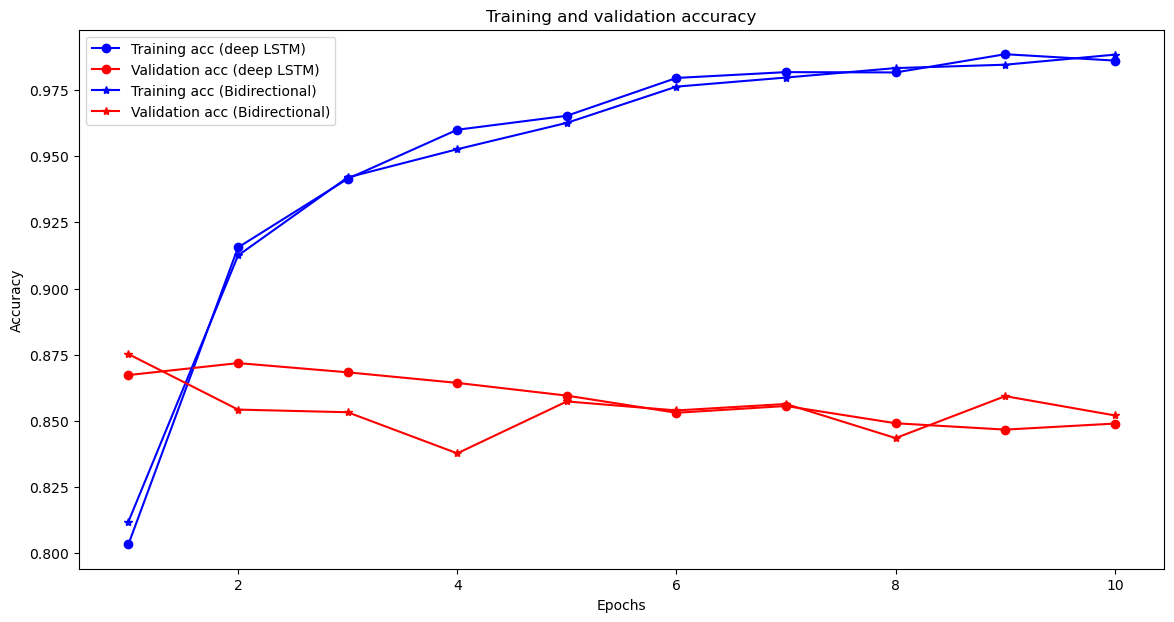

In [80]:
# Vizualization

# Deep LSTM Network training parameters
lstm_val_acc = history_deep_lstm.history['val_accuracy']
lstm_acc = history_deep_lstm.history['accuracy']

# Bidirectional models training parameters
bidirectional_val_acc = history_bidirectional.history['val_accuracy']
bidirectional_acc = history_bidirectional.history['accuracy']

# Defining the number of epochs
epochs = range(1, len(lstm_acc) + 1)

# Create an accuracy graph
plt.figure(figsize=(14, 7))

# Accuracy graph for Deep LSTM Network
plt.plot(epochs, lstm_acc, 'bo-', label='Training acc (deep LSTM)')
plt.plot(epochs, lstm_val_acc, 'ro-', label='Validation acc (deep LSTM)')

# Accuracy graph for Bidirectional
plt.plot(epochs, bidirectional_acc, 'b*-', label='Training acc (Bidirectional)')
plt.plot(epochs, bidirectional_val_acc, 'r*-', label='Validation acc (Bidirectional)')

plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

__Висновки__


Проста RNN показала здатність до швидкого навчання, але зіткнулася з проблемами перенавчання, що видно з високих втрат на валідаційних даних порівняно з тренувальними.

Модель LSTM виявилась більш ефективною у врахуванні контексту даних завдяки здатності зберігати інформацію на довгі періоди, що призвело до кращої точності на тестових даних.

Глибока LSTM мережа, яка включала кілька шарів LSTM, показала ще кращі результати, підтверджуючи припущення, що додавання глибини може допомогти в моделюванні складніших залежностей в даних.

Двостороння LSTM мережа забезпечила високу точність, використовуючи інформацію з тексту в обох напрямках, що дозволило ще краще вловлювати контекст відгуків.

Результати експериментів вказують на важливість вибору правильної архітектури нейронної мережі в залежності від специфіки задачі та даних. Глибокі та двосторонні мережі, хоч і вимагають більше часу для навчання, забезпечують значне покращення точності, що робить їх переважним вибором для складних задач обробки природної мови.